In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/fifa-20-complete-player-dataset/players_20.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/players_15.csv


Let's import the dataset

In [2]:
data = pd.read_csv("/kaggle/input/fifa-20-complete-player-dataset/players_20.csv")

Check the dataset

In [3]:
data.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


let's check the shape of the dataframe

In [4]:
data.shape 

(18278, 104)

In [5]:
for col in data.columns: 
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

Let's check the Brazilian Players list

### Data cleaning

In [6]:
# filling the missing value for the continous variables for proper data visualization
data['release_clause_eur'].fillna(0,inplace=True)
data['player_tags'].fillna('#Team Player',inplace=True)
data['team_position'].fillna('Not Decided',inplace=True)                                  
data['team_jersey_number'].fillna(0,inplace=True)
data['loaned_from'].fillna('Disclosed',inplace=True)
data['joined'].fillna('Disclosed',inplace=True)
data['contract_valid_until'].fillna('Disclosed',inplace=True)
data['nation_position'].fillna('Not Decided',inplace=True)
data['nation_jersey_number'].fillna(0,inplace=True)
data['pace'].fillna(data['pace'].mean(),inplace=True)
data['shooting'].fillna(data['shooting'].mean(),inplace=True)
data['passing'].fillna(data['passing'].mean(),inplace=True)
data['dribbling'].fillna(data['dribbling'].mean(),inplace=True)
data['defending'].fillna(data['defending'].mean(),inplace=True)
data['physic'].fillna(data['physic'].mean(),inplace=True)
data['gk_diving'].fillna(data['gk_diving'].mean(),inplace=True)
data['gk_handling'].fillna(data['gk_handling'].mean(),inplace=True)
data['gk_kicking'].fillna(data['gk_kicking'].mean(),inplace=True)
data['gk_reflexes'].fillna(data['gk_reflexes'].mean(),inplace=True)
data['gk_speed'].fillna(data['gk_speed'].mean(),inplace=True)
data['gk_positioning'].fillna(data['gk_positioning'].mean(),inplace=True)
data['player_traits'].fillna('Not Analyzed',inplace=True)
data['ls'].fillna('Not Analyzed',inplace=True)
data['st'].fillna('Not Analyzed',inplace=True)
data['rs'].fillna('Not Analyzed',inplace=True)
data['lw'].fillna('Not Analyzed',inplace=True)
data['lf'].fillna('Not Analyzed',inplace=True)
data['cf'].fillna('Not Analyzed',inplace=True)
data['rf'].fillna('Not Analyzed',inplace=True)
data['rw'].fillna('Not Analyzed',inplace=True)
data['lam'].fillna('Not Analyzed',inplace=True)
data['cam'].fillna('Not Analyzed',inplace=True)
data['ram'].fillna('Not Analyzed',inplace=True)
data['lm'].fillna('Not Analyzed',inplace=True)
data['lcm'].fillna('Not Analyzed',inplace=True)
data['cm'].fillna('Not Analyzed',inplace=True)
data['rcm'].fillna('Not Analyzed',inplace=True)
data['rm'].fillna('Not Analyzed',inplace=True)
data['lwb'].fillna('Not Analyzed',inplace=True)
data['ldm'].fillna('Not Analyzed',inplace=True)
data['cdm'].fillna('Not Analyzed',inplace=True)
data['rdm'].fillna('Not Analyzed',inplace=True)
data['rwb'].fillna('Not Analyzed',inplace=True)
data['lb'].fillna('Not Analyzed',inplace=True)
data['lcb'].fillna('Not Analyzed',inplace=True)
data['cb'].fillna('Not Analyzed',inplace=True)
data['rcb'].fillna('Not Analyzed',inplace=True)
data['rb'].fillna('Not Analyzed',inplace=True)

Drop useless columns

In [7]:
data.drop(['sofifa_id', 'player_url', 'dob'], axis=1, inplace=True)
data.head()

,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed,Not Analyzed
4,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## **Analyzing Brazil**

In [8]:
brazil_data = data['nationality']=='Brazil'
print(brazil_data.head())

0    False
1    False
2     True
3    False
4    False
Name: nationality, dtype: bool


In [9]:
brazil_data = data[brazil_data]
print(brazil_data.shape)

(824, 101)


In [10]:
is_brazil.head(10)

NameError: name 'is_brazil' is not defined

In [11]:
brazil_data['overall'].describe()

count    824.000000
mean      71.161408
std        5.423670
min       52.000000
25%       67.000000
50%       71.000000
75%       74.000000
max       92.000000
Name: overall, dtype: float64

### let's see the age disribution

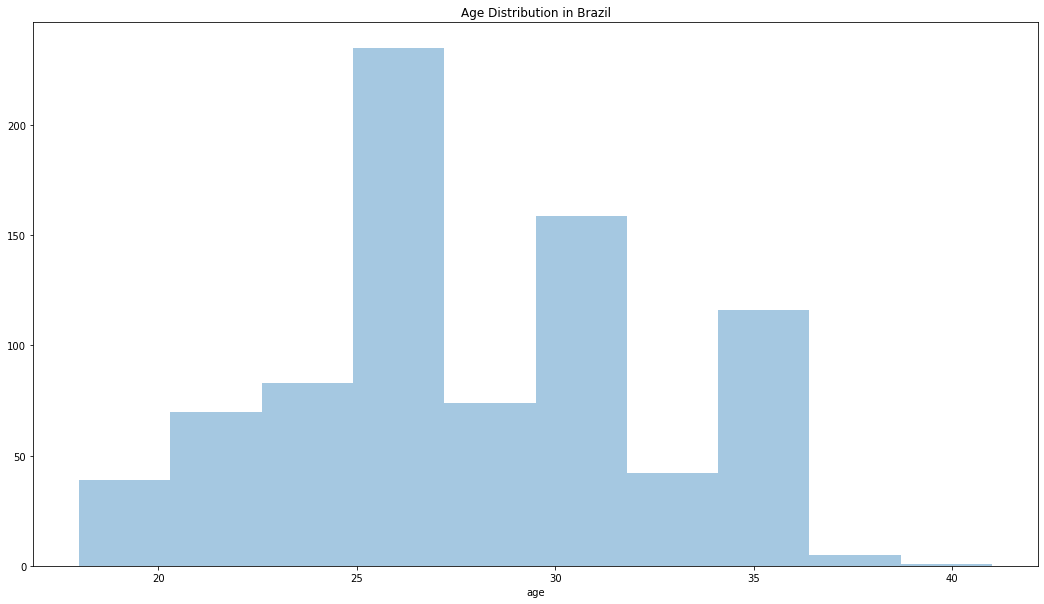

In [12]:
# Age Distribution 
plt.figure(figsize=(18,10))
plt.title('Age Distribution in Brazil')
sb.distplot(a=brazil_data['age'], kde=False, bins=10)

As expected, the plot reveals that we have a lot of youngsters at the team, which is good long-term for the Country.



Now let's check the overall and the potential, excluding players who have already hit their potential mark

In [13]:
brazil_data[(brazil_data['overall'] != brazil_data['potential']) 
            & (brazil_data['age'] <= 25)].sort_values(by='potential', 
            ascending=False)[['short_name', 'age', 'player_positions','overall', 'potential']]

,short_name,age,player_positions,overall,potential
568,Vinícius Jr.,18,LW,79,92
25,Ederson,25,GK,88,91
56,Marquinhos,25,"CB, CDM",86,90
115,Arthur,22,CM,84,89
81,Fabinho,25,CDM,85,89
...,...,...,...,...,...
10572,Ygor Nogueira,24,CB,65,67
10626,Bruno,25,GK,65,66
16191,Fabio,23,CB,58,66
13671,Rafinha,25,CM,62,65


Team Manager should keep an eye on these players. Because these player are worth investing for long term for the future of the team.

Now let's check the older players of the country

In [14]:
brazil_data[brazil_data['overall'] == brazil_data['potential']][['short_name', 'age', 'overall' ,'value_eur', 'wage_eur']].sort_values(by='age', ascending=False)

,short_name,age,overall,value_eur,wage_eur
868,Hilton,41,78,0,21000
1914,Cássio,38,75,675000,11000
3756,Bracali,38,72,325000,3000
1429,Gomes,38,76,775000,27000
9738,Rafinha,37,66,130000,1000
...,...,...,...,...,...
9892,Zé Uilton,26,66,700000,4000
8603,Welinton Júnior,26,67,825000,5000
556,Bernard,26,80,16000000,88000
3973,Gabriel Xavier,25,72,3400000,7000


Height and Weight Distribution of the team:

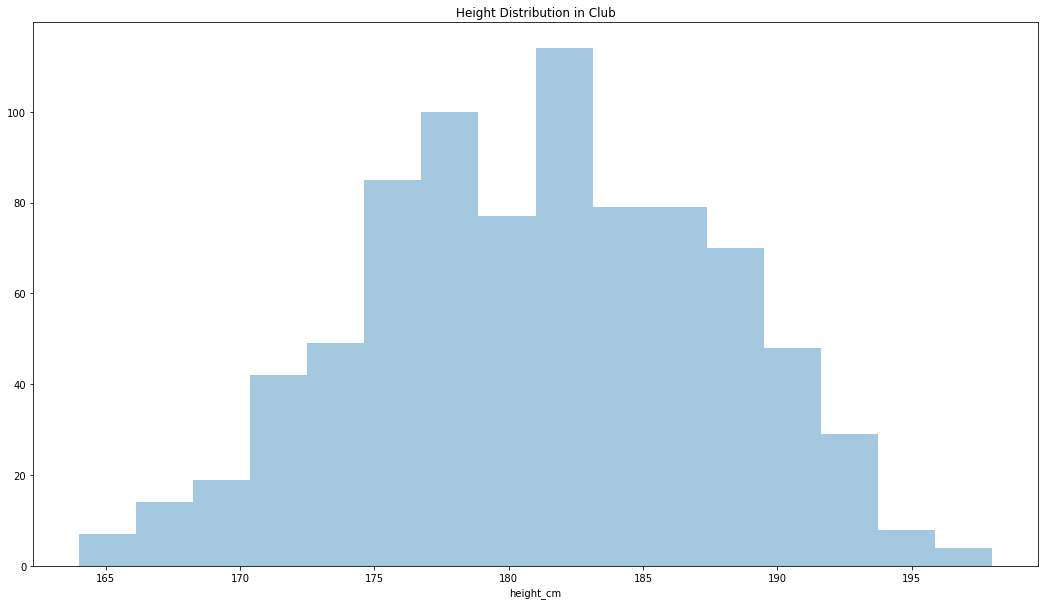

In [15]:
# Height Distribution 
plt.figure(figsize=(18,10))
plt.title('Height Distribution in Club')
sb.distplot(a=brazil_data['height_cm'], kde=False)

In [16]:
brazil_data['height_cm'].mean()

181.11165048543688

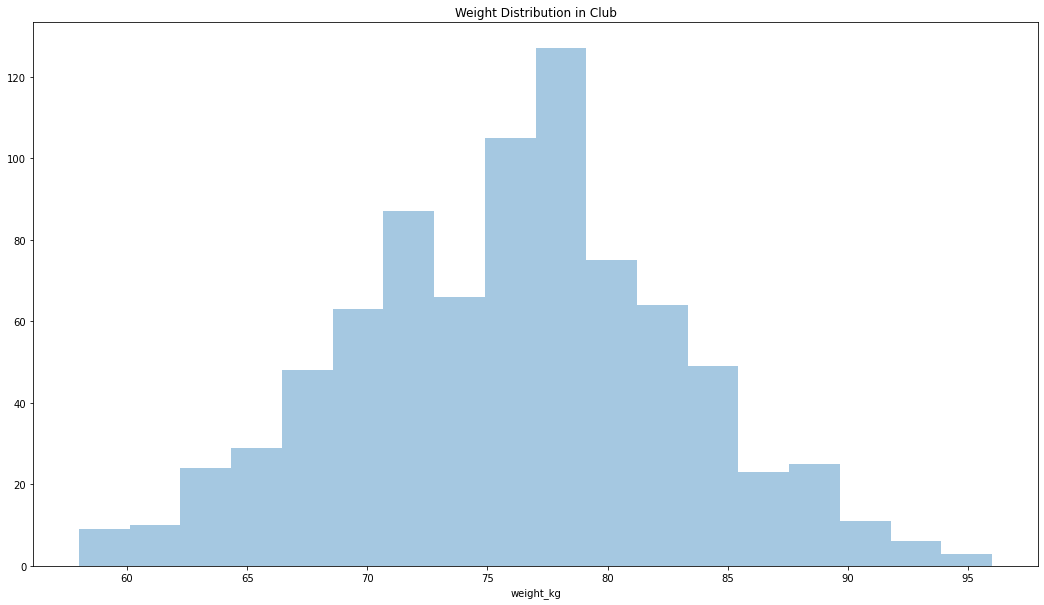

In [17]:
# Weight Distribution 
plt.figure(figsize=(18,10))
plt.title('Weight Distribution in Club')
sb.distplot(a=brazil_data['weight_kg'], kde=False)

In [18]:
# mean weight
brazil_data['weight_kg'].mean()

75.94174757281553

What is the relationship between Age and Potential and Overall Rating of a Player?

Text(0.5, 1.0, 'Age vs Potential')

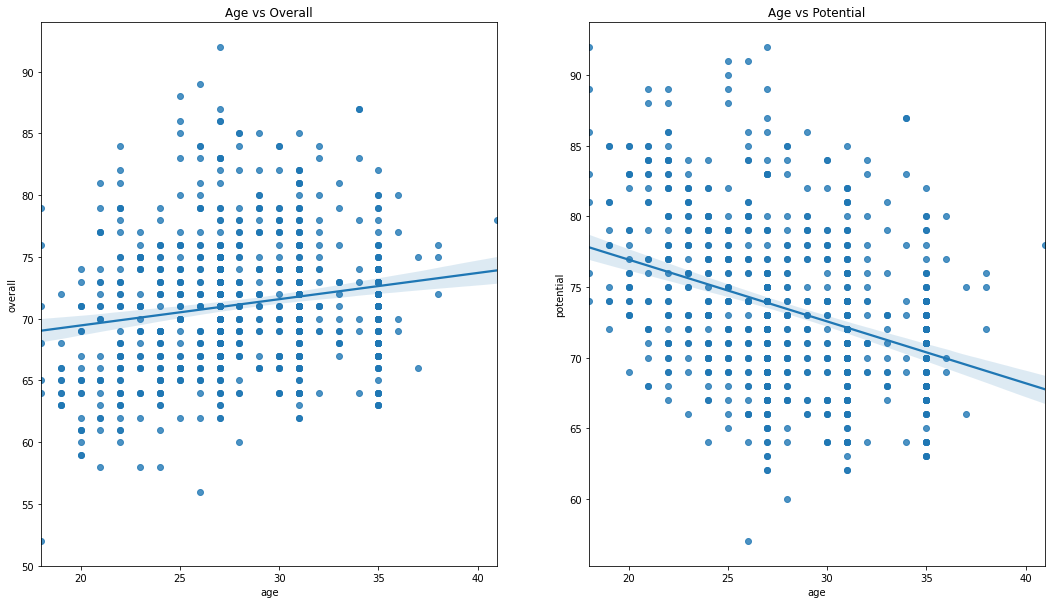

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(18,10))
sb.regplot(x=brazil_data['age'], y=brazil_data['overall'], ax=ax[0])
sb.regplot(x=brazil_data['age'], y=brazil_data['potential'], ax=ax[1])
ax[0].set_title('Age vs Overall')
ax[1].set_title('Age vs Potential')

Overall Rating seems to improve with age while Potential Rating reduces with increasing age.

In [20]:
# Top 10 left footed footballers

brazil_data[brazil_data['preferred_foot'] == 'Left'][['short_name', 'age', 'club', 'nationality']].head(10)

,short_name,age,club,nationality
25,Ederson,25,Manchester City,Brazil
101,Marcelo,31,Real Madrid,Brazil
103,Alex Sandro,28,Juventus,Brazil
124,Alex Telles,26,FC Porto,Brazil
150,Douglas Costa,28,Juventus,Brazil
164,Anderson Talisca,25,Guangzhou Evergrande Taobao FC,Brazil
340,David Neres,22,Ajax,Brazil
344,Rafinha,26,FC Barcelona,Brazil
394,Luiz Gustavo,31,Olympique de Marseille,Brazil
406,Laure Santeiro,31,Fluminense,Brazil


In [21]:
# Top 10 right footed footballers

brazil_data[brazil_data['preferred_foot'] == 'Right'][['short_name', 'age', 'club', 'nationality']].head(10)

,short_name,age,club,nationality
2,Neymar Jr,27,Paris Saint-Germain,Brazil
13,Alisson,26,Liverpool,Brazil
42,Casemiro,27,Real Madrid,Brazil
44,Fernandinho,34,Manchester City,Brazil
45,Thiago Silva,34,Paris Saint-Germain,Brazil
56,Marquinhos,25,Paris Saint-Germain,Brazil
63,Roberto Firmino,27,Liverpool,Brazil
68,Coutinho,27,FC Bayern München,Brazil
81,Fabinho,25,Liverpool,Brazil
91,Neto,29,FC Barcelona,Brazil


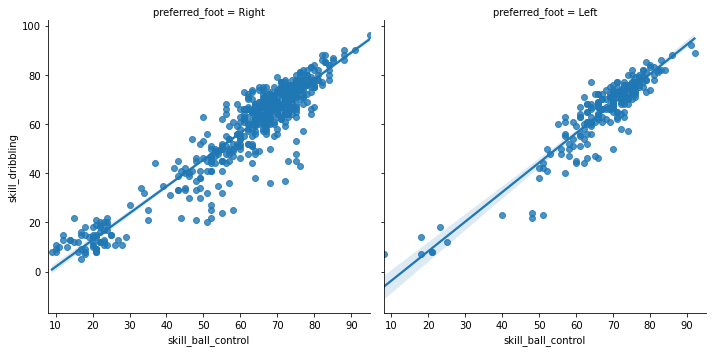

In [22]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sb.lmplot(x = 'skill_ball_control', y = 'skill_dribbling', data = brazil_data, col = 'preferred_foot')
plt.show()

# **Summery**

We didn't explore the database with something specific in mind. But we have found some interesting data while exploring Brazil team.
We have found that Brazil team has more young players.
Average height of 181 cm.
Average weight 76 kg.
We have learned that the more age increses their overall increses but potentiality decreses. 
We have seen that their are more Right footed players than Left footed players.